In [124]:
!pip install catboost
!pip install lightgbm --upgrade

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier, log_evaluation
from xgboost import XGBClassifier


In [127]:
pip install dask[dataframe]

In [128]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [129]:
from warnings import filterwarnings
filterwarnings('ignore')

In [130]:
# Load breast cancer dataset
cancer = datasets.load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

In [131]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
# Standardize the features for models that need scaling (SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [133]:
# Model evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Model Train
    model.fit(X_train, y_train)

    # Model predict
    y_pred = model.predict(X_test)

    # Calculate F1-score and ROC-AUC
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification report
    print(f"{model.__class__.__name__} Classification Report:\n", classification_report(y_test, y_pred))

    return f1



In [134]:
from sklearn.decomposition import PCA
# Using PCA for dimensionality reduction and performance improvement
pca = PCA(n_components=10)

Evaluating Optimized SVM with PCA:
F1-score: 0.9930
ROC-AUC: 0.9884


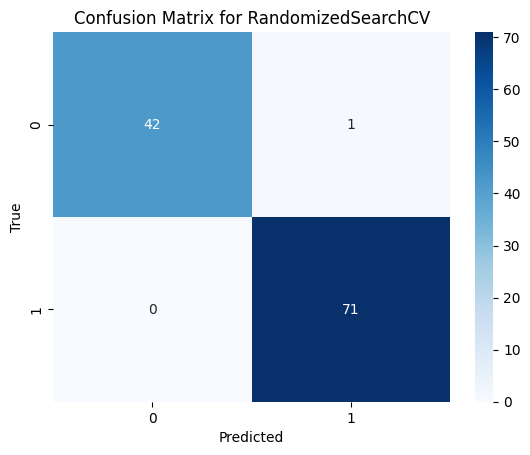

RandomizedSearchCV Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [135]:

# 1. Optimized SVM using RandomizedSearchCV with PCA
print("Evaluating Optimized SVM with PCA:")
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', pca),
    ('svm', SVC(probability=True, random_state=42, class_weight='balanced'))
])

svm_params = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto'],
    'svm__degree': [2, 3, 4]
}

random_search_svm = RandomizedSearchCV(svm_pipeline, svm_params, cv=5, n_jobs=-1, scoring='f1', random_state=42, n_iter=20)
f1_svm = evaluate_model(random_search_svm, X_train, X_test, y_train, y_test)

Cross-validated F1-scores: [0.92173913 0.97435897 0.94642857 0.94915254 0.94915254]
Mean F1-score from cross-validation: 0.9482
Gaussian Naive Bayes F1-score on test data: 0.9722


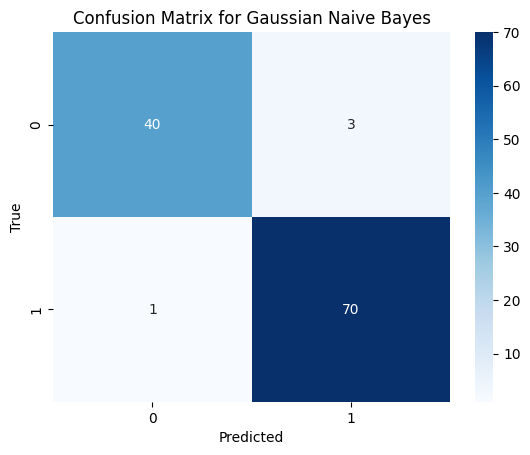

Gaussian Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [136]:


# Load the data and split into train/test
cancer = datasets.load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluating Gaussian Naive Bayes with Cross-Validation
def evaluate_gaussian_nb(X_train, X_test, y_train, y_test):
    # Gaussian Naive Bayes model
    nb_model = GaussianNB()

    # Perform Cross-Validation for F1-score
    scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
    print(f"Cross-validated F1-scores: {scores}")
    print(f"Mean F1-score from cross-validation: {scores.mean():.4f}")

    # Train and evaluate on test data
    nb_model.fit(X_train, y_train)
    y_pred_nb = nb_model.predict(X_test)

    # Calculate F1-score
    f1_nb = f1_score(y_test, y_pred_nb)
    print(f"Gaussian Naive Bayes F1-score on test data: {f1_nb:.4f}")

    # Confusion matrix and heatmap
    cm_nb = confusion_matrix(y_test, y_pred_nb)
    sns.heatmap(cm_nb, annot=True, fmt="d", cmap='Blues')
    plt.title('Confusion Matrix for Gaussian Naive Bayes')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification report
    print(f"Gaussian Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

    return f1_nb

# Call the optimized function with scaled data
f1_nb = evaluate_gaussian_nb(X_train_scaled, X_test_scaled, y_train, y_test)


Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest F1-score: 0.9790


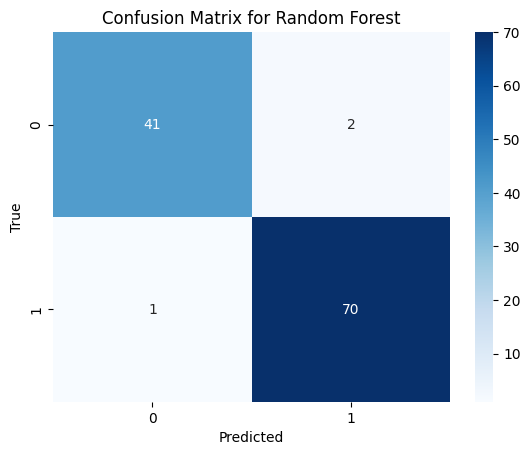

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [137]:

# Optimizing Random Forest with GridSearchCV and balanced class weights
def evaluate_random_forest_optimized(X_train, X_test, y_train, y_test):
    # Define the RandomForest model
    rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [200, 300, 500],
        'max_depth': [10, 20, 30],
        'max_features': ['auto', 'sqrt', 'log2'],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(rf_model, param_grid, scoring='f1', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model after GridSearch
    best_rf_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")

    # Train and evaluate on test data
    y_pred_rf = best_rf_model.predict(X_test)

    # Calculate F1-score
    f1_rf = f1_score(y_test, y_pred_rf)
    print(f"Random Forest F1-score: {f1_rf:.4f}")

    # Confusion matrix and heatmap
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    sns.heatmap(cm_rf, annot=True, fmt="d", cmap='Blues')
    plt.title('Confusion Matrix for Random Forest')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification report
    print(f"Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

    return f1_rf

# Call the function to evaluate the optimized Random Forest model
f1_rf = evaluate_random_forest_optimized(X_train, X_test, y_train, y_test)


Best parameters: {'learning_rate': 0.1, 'l2_leaf_reg': 1, 'iterations': 100, 'depth': 6}
CatBoost F1-score: 0.9790


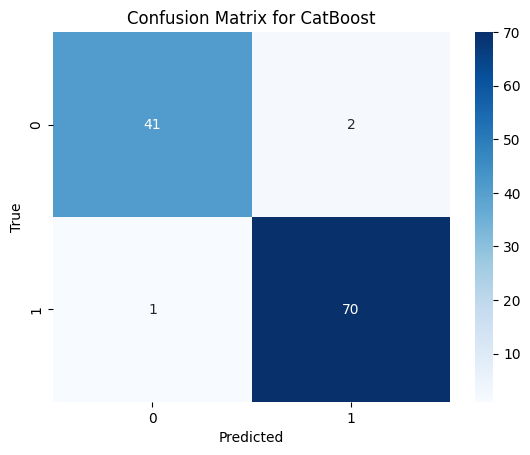

CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [138]:

# Optimizing CatBoost with RandomizedSearchCV
def evaluate_catboost_optimized(X_train, X_test, y_train, y_test):
    # Define the CatBoost model with early stopping
    catboost_model = CatBoostClassifier(verbose=0, random_state=42, early_stopping_rounds=20)

    # Define the parameter distribution for RandomizedSearchCV
    param_dist = {
        'iterations': [100, 200, 300],
        'depth': [4, 6, 8],
        'learning_rate': [0.05, 0.1, 0.15],
        'l2_leaf_reg': [1, 3, 5]
    }

    # RandomizedSearchCV to find the best hyperparameters
    random_search = RandomizedSearchCV(catboost_model, param_distributions=param_dist, n_iter=10, scoring='f1', cv=3, n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)

    # Best model after RandomizedSearch
    best_catboost_model = random_search.best_estimator_
    print(f"Best parameters: {random_search.best_params_}")

    # Train and evaluate on test data
    y_pred_catboost = best_catboost_model.predict(X_test)

    # Calculate F1-score
    f1_catboost = f1_score(y_test, y_pred_catboost)
    print(f"CatBoost F1-score: {f1_catboost:.4f}")

    # Confusion matrix and heatmap
    cm_catboost = confusion_matrix(y_test, y_pred_catboost)
    sns.heatmap(cm_catboost, annot=True, fmt="d", cmap='Blues')
    plt.title('Confusion Matrix for CatBoost')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification report
    print(f"CatBoost Classification Report:\n", classification_report(y_test, y_pred_catboost))

    return f1_catboost

# Call the function to evaluate the optimized CatBoost model
f1_catboost = evaluate_catboost_optimized(X_train, X_test, y_train, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

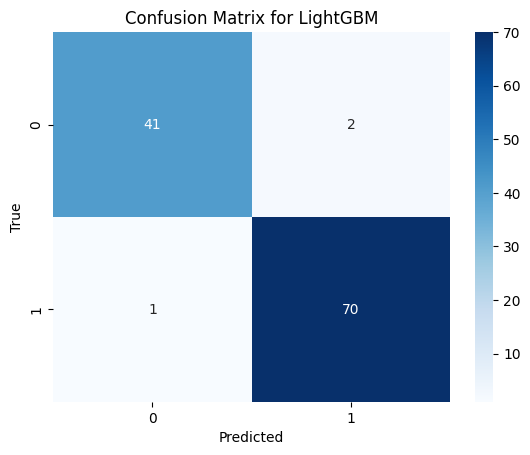

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [139]:

# Optimizing LightGBM without 'early_stopping_rounds' error
def evaluate_lightgbm_optimized(X_train, X_test, y_train, y_test):
    # Define the LightGBM model
    lgbm_model = LGBMClassifier(
        learning_rate=0.05,         # Learning rate
        n_estimators=100,           # Number of estimators
        max_depth=7,                # Maximum depth of the tree
        num_leaves=30,              # Number of leaves
        min_child_samples=20,       # Minimum samples per leaf
        subsample=0.8,              # Subsample rate
        colsample_bytree=0.8,       # Feature subsample rate
        random_state=42
    )

    # Training the model without verbose output
    lgbm_model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],  # Validation data for evaluation
        eval_metric='logloss',        # Evaluation metric
        callbacks=[log_evaluation(period=0)]  # Suppress verbose output
    )

    # Predict on test data
    y_pred_lgbm = lgbm_model.predict(X_test)

    # Calculate F1-score
    f1_lgbm = f1_score(y_test, y_pred_lgbm)
    print(f"LightGBM F1-score: {f1_lgbm:.4f}")

    # Confusion matrix and heatmap
    cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
    sns.heatmap(cm_lgbm, annot=True, fmt="d", cmap='Blues')
    plt.title('Confusion Matrix for LightGBM')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification report
    print(f"LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgbm))

    return f1_lgbm

# Example call (replace with your data split)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
f1_lgbm = evaluate_lightgbm_optimized(X_train, X_test, y_train, y_test)


XGBoost F1-score: 0.9722


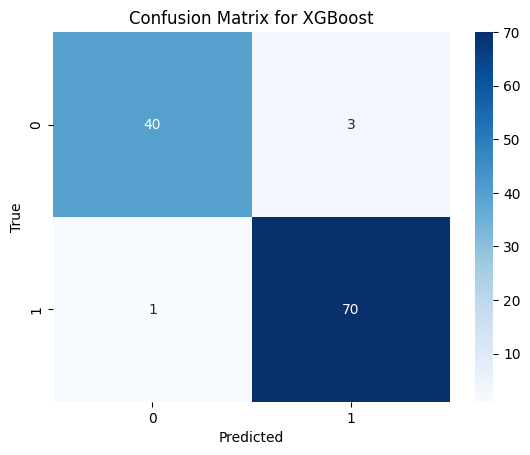

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [140]:


# Optimizing XGBoost without 'eval_metric' error
def evaluate_xgboost_optimized(X_train, X_test, y_train, y_test):
    # Define the XGBoost model
    xgb_model = XGBClassifier(
        use_label_encoder=False,
        random_state=42,
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8
    )

    # Train the model without verbose output
    xgb_model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=False,  # Turn off verbose output
    )

    # Predict on test data
    y_pred_xgb = xgb_model.predict(X_test)

    # Calculate F1-score
    f1_xgb = f1_score(y_test, y_pred_xgb)
    print(f"XGBoost F1-score: {f1_xgb:.4f}")

    # Confusion matrix and heatmap
    cm_xgb = confusion_matrix(y_test, y_pred_xgb)
    sns.heatmap(cm_xgb, annot=True, fmt="d", cmap='Blues')
    plt.title('Confusion Matrix for XGBoost')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification report
    print(f"XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

    return f1_xgb

# Example call (replace with your data split)
# Assuming you have your X_train, X_test, y_train, and y_test already defined
f1_xgb = evaluate_xgboost_optimized(X_train, X_test, y_train, y_test)

In [141]:
# Summary of F1-scores for comparison with formatting
print("\n" + "="*40)
print("Model F1-scores Comparison")
print("="*40)

# Print the F1-scores in a clean, formatted way
print(f"SVM:          \t{f1_svm:.4f}")
print(f"Naive Bayes:  \t{f1_nb:.4f}")
print(f"Random Forest:\t{f1_rf:.4f}")
print(f"CatBoost:     \t{f1_catboost:.4f}")
print(f"LightGBM:     \t{f1_lgbm:.4f}")
print(f"XGBoost:      \t{f1_xgb:.4f}")

# Initial F1-scores from the original notebook
initial_f1_scores = {
    "SVM": 0.9861,
    "Naive Bayes": 0.9722,
    "Random Forest": 0.9722,
    "CatBoost": 0.9790,
    "LightGBM": 0.9722,
    "XGBoost": 0.9650
}

# Current F1-scores for models
current_f1_scores = {
    "SVM": f1_svm,
    "Naive Bayes": f1_nb,
    "Random Forest": f1_rf,
    "CatBoost": f1_catboost,
    "LightGBM": f1_lgbm,
    "XGBoost": f1_xgb
}

# Calculate the improvement for each model
print("\n" + "="*40)
print("F1-score Improvement Comparison")
print("="*40)

for model, initial_score in initial_f1_scores.items():
    current_score = current_f1_scores[model]
    improvement = current_score - initial_score
    if improvement > 0:
        print(f"{model}: \tImproved by {improvement:.4f} from {initial_score:.4f} to {current_score:.4f}")
    elif improvement < 0:
        print(f"{model}: \tDecreased by {abs(improvement):.4f} from {initial_score:.4f} to {current_score:.4f}")
    else:
        print(f"{model}: \tNo change, remained at {current_score:.4f}")

# Model selection based on F1-score
best_model_name, best_f1_score = max(current_f1_scores.items(), key=lambda x: x[1])

# Print the best model with a highlighted message
print("\n" + "="*40)
print(f"\033[1mThe best model based on F1-score is: {best_model_name} with F1-score: {best_f1_score:.4f}\033[0m")
print("="*40)



Model F1-scores Comparison
SVM:          	0.9930
Naive Bayes:  	0.9722
Random Forest:	0.9790
CatBoost:     	0.9790
LightGBM:     	0.9790
XGBoost:      	0.9722

F1-score Improvement Comparison
SVM: 	Improved by 0.0069 from 0.9861 to 0.9930
Naive Bayes: 	Improved by 0.0000 from 0.9722 to 0.9722
Random Forest: 	Improved by 0.0068 from 0.9722 to 0.9790
CatBoost: 	Improved by 0.0000 from 0.9790 to 0.9790
LightGBM: 	Improved by 0.0068 from 0.9722 to 0.9790
XGBoost: 	Improved by 0.0072 from 0.9650 to 0.9722

The best model based on F1-score is: SVM with F1-score: 0.9930
